In [81]:
import numpy as np
import sympy as sp
x = sp.Symbol('x')

def integralEsq(func, limInf, limSup, n):
    y  = sp.lambdify(x, func)
    xe = np.arange(limInf, limSup, (limSup - limInf)/n)
    return np.sum(y(xe))*(limSup - limInf)/n
def integralTrap(func, limInf, limSup, n):
    y  = sp.lambdify(x, func)
    xe = np.arange(limInf, limSup, (limSup - limInf)/n)
    xd = np.arange(limInf + (limSup - limInf)/n, limSup + (limSup - limInf)/n, (limSup - limInf)/n)
    return np.sum((y(xe)+y(xd))*(limSup - limInf)/(n*2))
def integralSimp(func, limInf, limSup, n):
    y  = sp.lambdify(x, func)
    xe = np.arange(limInf, limSup, (limSup - limInf)/n)
    xd = np.arange(limInf + (limSup - limInf)/n, limSup + (limSup - limInf)/n, (limSup - limInf)/n)
    return np.sum((y(xe)+4*y((xd+xe)/2)+y(xd))*(limSup - limInf)/(n*6))
def digSig(x1, x):
    return round(abs(np.log10(abs((x1-x)/x1))))

### 1) Aproxime $\int_2^3 cos(2 x) dx$ utilizando somas de Riemann a esquerda com $n=32$ intervalos. 

In [70]:
y1 = sp.cos(2*x)
integralEsq(y1, 2, 3, 32)

0.21339995148398938

### 2) Aproxime $\int_2^3 cos(2 x) dx$ utilizando o método do trapézio com $n=8$ intervalos. 

In [71]:
y2 = sp.cos(2*x)
integralTrap(y1, 2, 3, 8)

0.23744900632432864

### 3) Aproxime $\int_2^3 \cos(2 x) dx$ utilizando o método de Simpson com com $n=64$ intervalos. 

In [72]:
y3 = sp.cos(2*x)
integralSimp(y3, 2, 3, 64)

0.2386934986335437

### 4) Aproxime $\int_2^3 \sin( \cos(2 x) ) dx$ com $7$ dígitos significativos. 

In [73]:
y4 = sp.sin(sp.cos(2*x))
sp.integrate(y4, (x, 2, 3)).evalf()

0.211377947204351

### 5) Para aproximar $\int_2^3 \sin( \cos(2 x) ) dx$ com $3$ dígitos significativos e o método do trapézio, quantos intervalos são necessários? 

In [74]:
y5 = sp.sin(sp.cos(2*x))
integral5 = float(sp.integrate(y5, (x, 2, 3)).evalf())
intervalo5 = 2
while digSig(integralTrap(y5, 2, 3, intervalo5), integral5) < 3 and intervalo5 < 130:
    intervalo5 = intervalo5 + 1
intervalo5

11

### 6) Ao utilizar o método do trapézio para calcular uma integral com $20$ intervalos temos um erro de aproximadamente $0.001$. Se utilizarmos $100$ intervalos, de quando será o erro aproximadamente? 

In [75]:
o6 = 100/20
0.001/(o6**2)

4e-05

### 7) Ao utilizar o método de Simpson para calcular uma integral com $h=0.01$ temos um erro de aproximadamente $0.001$. Se utilizarmos $h=0.001$, de quando será o erro aproximadamente? 

In [76]:
o7 = 0.01/0.001
0.001/o7**4

1e-07

### 8) Aproxime $\int_0^2 x^2+\exp(x) dx$ utilizando somas de Riemann a esquerda com $h=0.0078125$. 

In [77]:
y8 = x**2 + sp.exp(x)
h8 = 0.0078125
intervalos8 = 2/h8
integralEsq(y8, 0, 2, intervalos8)

9.01519335664967

### 9) Aproxime $\int_0^2 x^2+\exp(x) dx$ utilizando o método do trapézio com $h=0.0625$.

In [78]:
y9 = x**2 + sp.exp(x)
h9 = 0.0625
intervalos9 = 2/h9
integralTrap(y9, 0, 2, intervalos9)

9.05910448440703

### 10) Aproxime $\int_0^2 x^2+\exp(x) dx$ utilizando o método de Simspon com $h=0.5$.

In [82]:
y10 = x**2 + sp.exp(x)
h10 = 0.5
intervalos10 = 2/h10
integralSimp(y10, 0, 2, intervalos10)

9.05586039208309

In [68]:
def integralSimp2(func, limInf, limSup, n):
    y  = sp.lambdify(x, func)
    xe = np.arange(limInf, limSup, (limSup - limInf)/n)
    xd = np.arange(limInf + (limSup - limInf)/n, limSup + (limSup - limInf)/n, (limSup - limInf)/n)
    return np.sum((y(xe)+4*y((xd+xe)/2)+y(xd))*(limSup - limInf)/(n*6))
display(integralSimp2(y10, 0, 2, 1000))

9.055722765597352

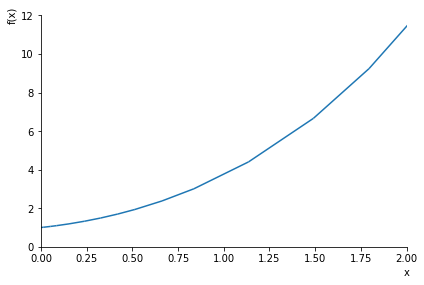

2.05161516179238

7.00410760380494

In [57]:
sp.plot(y10, xlim=(0,2), ylim=(0,12))
display(sp.integrate(y10, (x, 0, 1)).evalf())
display(sp.integrate(y10, (x, 1, 2)).evalf())